# Lake Models

 ## Steady state

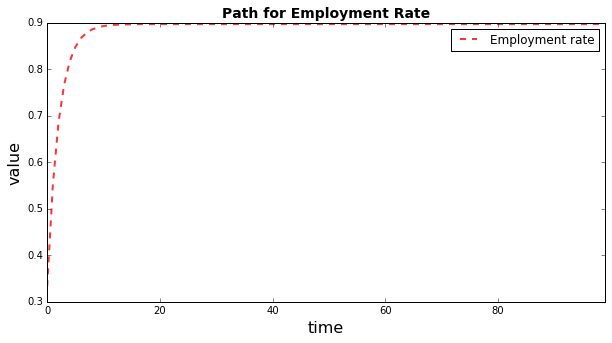

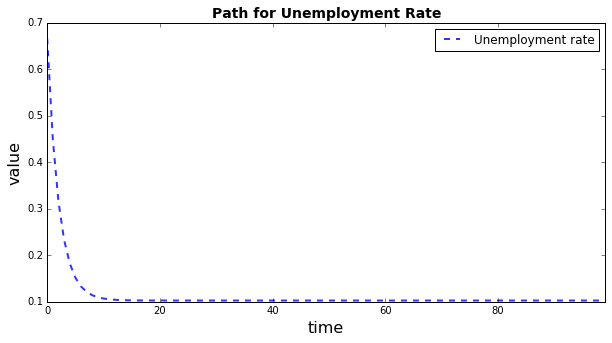

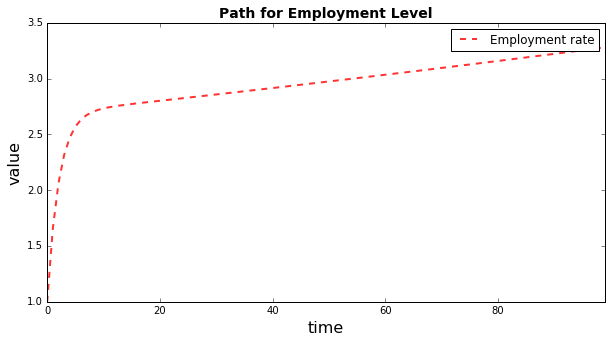

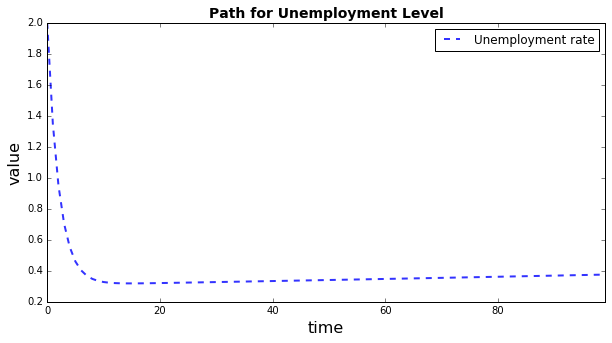

In [122]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

  
# Lake Model
# x_t+1 = A x_t
 

# == parameters == #
# lambda: The job finding rate for currently unemployed workers
# alpha: The dismissal rate for currently employed workers
# b: Entry rate into the labor force
# d: Exit rate from the labor force

lam    = 0.35
alpha  = 0.03
b      = 0.01
d      = 0.008
g      = b-d

A      = np.array(([(1-d)*(1-alpha),(1-d)*lam],[(1-d)*alpha+b,(1-d)*(1-lam)+b]))

A_hat  = 1.0/(1.0+g)*np.array(([(1-d)*(1-alpha),(1-d)*lam],[(1-d)*alpha+b,(1-d)*(1-lam)+b]))

# N: number of periods for the transition

N = 100
 
# == set up the simulation and initialize the arrays == #
  
x_rate  = np.zeros((N,2))

x_level = np.zeros((N,2))

x_level[0,:]=np.array([1,2])

x_rate[0,:]=x_level[0,:]/(x_level[0,0]+x_level[0,1])

# == Simulation == #

for i in range(1,N):
    x_rate[i,:] =  np.dot(A_hat, x_rate[i-1,:])
    x_level[i,:] =  np.dot(A, x_level[i-1,:])
    

# == Plots == #
     
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)   
ax.plot(x_rate[:,0], 'r--', lw=2, alpha=0.8, label=r'Employment rate')   
ax.legend(ncol=1)
plt.title(r"Path for Employment Rate", fontsize=14, fontweight='bold')
   
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)  
ax.plot(x_rate[:,1], 'b--', lw=2, alpha=0.8, label=r'Unemployment rate')     
ax.legend(ncol=1)
plt.title(r"Path for Unemployment Rate", fontsize=14, fontweight='bold')
plt.show()   


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)   
ax.plot(x_level[:,0], 'r--', lw=2, alpha=0.8, label=r'Employment rate')   
ax.legend(ncol=1)
plt.title(r"Path for Employment Level", fontsize=14, fontweight='bold')
   
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)  
ax.plot(x_level[:,1], 'b--', lw=2, alpha=0.8, label=r'Unemployment rate')     
ax.legend(ncol=1)
plt.title(r"Path for Unemployment Level", fontsize=14, fontweight='bold')
plt.show()   

 

## Markov Chain

### Simulate Markov Chain

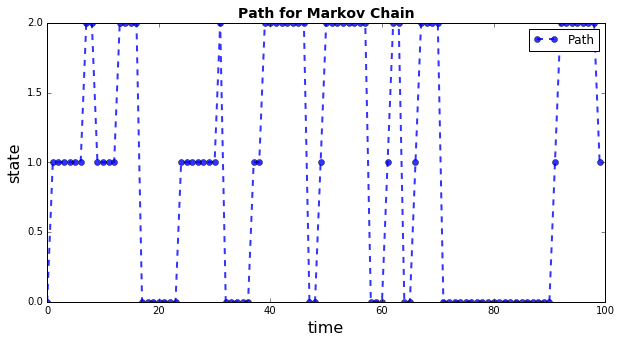

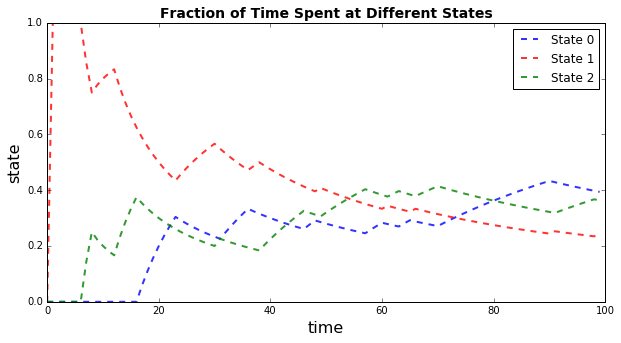

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

  
# Markov Chain
 
 

# == parameters == #
# N: number of states
# P: Stochastic Matrix 
 


N = 3

P = np.array(([0.9,0.1,0],[0.05,0.45,0.5],[1/9,1/9,7/9])) 

# T: number of periods for the transition

T = 100
 
# == set up the simulation and initialize the arrays == #
  
X  = np.zeros((T), dtype=np.int)
 
X[0]=0

Shock = np.random.uniform(0, 1, T)


# f: fraction of time spent at different states

count  = np.zeros((N), dtype=np.int)

f  = np.zeros((T,N))

# == Simulation == #

for i in range(1,T): 
    X[i]=0       
    
    for j in range(1,N):           
        if  Shock[i]>sum(P[X[i-1],0:j]) and  Shock[i]<=sum(P[X[i-1],0:j+1]):                             
            X[i]=j 
            
    count[X[i]]=count[X[i]]+1        
    
    for j in range(0,N):
        f[i,j] = count[j]/i   
            

            
# == Plots == #
     
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, T)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'state', fontsize=16)   
ax.plot(X, 'bo--', lw=2, alpha=0.8, label='Path')   
ax.legend(ncol=1)
plt.title(r"Path for Markov Chain", fontsize=14, fontweight='bold')            
             
    
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, T)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'state', fontsize=16)   
ax.plot(f[:,0], 'b--', lw=2, alpha=0.8, label='State 0')   
ax.plot(f[:,1], 'r--', lw=2, alpha=0.8, label='State 1')  
ax.plot(f[:,2], 'g--', lw=2, alpha=0.8, label='State 2')  
ax.legend(ncol=1)
plt.title(r"Fraction of Time Spent at Different States", fontsize=14, fontweight='bold')            
      
    
plt.show()   

## Marginal Distribution

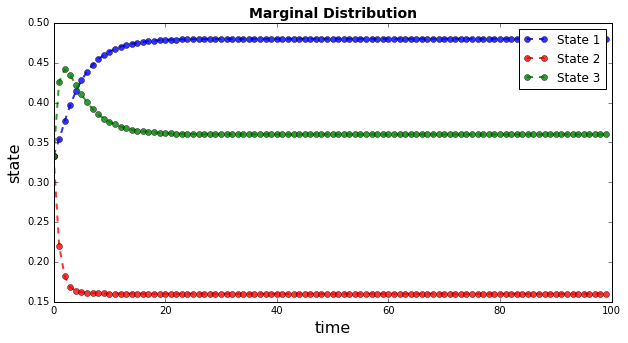

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

  
# Markov Chain
 
 

# == parameters == #
# N: number of states
# P: Stochastic Matrix 
 

N = 3

P = np.array(([0.9,0.1,0],[0.05,0.45,0.5],[1/9,1/9,7/9])) 

# T: number of periods for the transition

T = 100
 
# == set up the simulation and initialize the arrays == #
  
d  = np.zeros((T,N))
 
d[0,:]= np.array(([1/3,1/3,1/3])) 
  
# == Simulation == #

for i in range(1,T): 
    d[i,:] = np.dot(d[i-1,:], P)
     
            
           
# == Plots == #
     
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, T)
ax.set_xlabel(r'time', fontsize=16)
ax.set_ylabel(r'state', fontsize=16)   
ax.plot(d[:,0], 'bo--', lw=2, alpha=0.8, label='State 1')   
ax.plot(d[:,1], 'ro--', lw=2, alpha=0.8, label='State 2')   
ax.plot(d[:,2], 'go--', lw=2, alpha=0.8, label='State 3')   
ax.legend(ncol=1)
plt.title(r"Marginal Distribution", fontsize=14, fontweight='bold')            
             
    
     
    
plt.show()   